<a href="https://colab.research.google.com/github/Jaehyeonee/GraphicProgramming/blob/main/cloudNet_self_supervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# References

[Course Webpage](https://sites.google.com/view/berkeley-cs294-158-sp20/home)

[1] Pathak, Deepak, et al. "Context encoders: Feature learning by inpainting." Proceedings of the IEEE conference on computer vision and pattern recognition. 2016.

[2] Gidaris, Spyros, Praveer Singh, and Nikos Komodakis. "Unsupervised representation learning by predicting image rotations." arXiv preprint arXiv:1803.07728 (2018).

[3] Chen, Ting, et al. "A simple framework for contrastive learning of visual representations." arXiv preprint arXiv:2002.05709 (2020).

[4] Noroozi, Mehdi, and Paolo Favaro. "Unsupervised learning of visual representations by solving jigsaw puzzles." European Conference on Computer Vision. Springer, Cham, 2016.

[5] Wang, Xiaolong, Allan Jabri, and Alexei A. Efros. "Learning correspondence from the cycle-consistency of time." Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition. 2019.

[6] Oord, Aaron van den, Yazhe Li, and Oriol Vinyals. "Representation learning with contrastive predictive coding." arXiv preprint arXiv:1807.03748 (2018).

[7] Hénaff, Olivier J., et al. "Data-efficient image recognition with contrastive predictive coding." arXiv preprint arXiv:1905.09272 (2019).

[8] Tian, Yonglong, Dilip Krishnan, and Phillip Isola. "Contrastive multiview coding." arXiv preprint arXiv:1906.05849 (2019).

[9] He, Kaiming, et al. "Momentum contrast for unsupervised visual representation learning." arXiv preprint arXiv:1911.05722 (2019).

[10] Doersch, Carl, Abhinav Gupta, and Alexei A. Efros. "Unsupervised visual representation learning by context prediction." Proceedings of the IEEE International Conference on Computer Vision. 2015.

[11] Ronneberger, Olaf, Philipp Fischer, and Thomas Brox. "U-net: Convolutional networks for biomedical image segmentation." International Conference on Medical image computing and computer-assisted intervention. Springer, Cham, 2015.

In [ ]:
!wget https://www.dropbox.com/s/i0mmu66m8hgyppp/data.zip?dl=0

--2023-06-18 12:06:31--  https://www.dropbox.com/s/i0mmu66m8hgyppp/data.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/i0mmu66m8hgyppp/data.zip [following]
--2023-06-18 12:06:31--  https://www.dropbox.com/s/raw/i0mmu66m8hgyppp/data.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd675b301826c74f3b83083678b.dl.dropboxusercontent.com/cd/0/inline/B-O9KcqChDEdwA-VyMplT9JJmOeOj5enHxABiUfvrwNfcJ9N-OyOULh1q4YwgKa6I7nPI_QrQH8e0-SBwcqHpuFAWuRo5UTjyreBPECbt8omyBY1xxuOXVJS0nEBptCQROzoUHL_dt1LIsk7Xyb3Nwt7Ev7hL3FwoAlrc1KRxJMl8w/file# [following]
--2023-06-18 12:06:32--  https://ucd675b301826c74f3b83083678b.dl.dropboxusercontent.com/cd/0/inline/B-O9KcqChDEdwA-VyMplT9JJmOeOj5enHxABiUfvrwNfcJ9N-OyOULh1q4YwgKa6I7nPI_QrQH8e0-SBwcqH

In [ ]:
!unzip data.zip?dl=0

Archive:  data.zip?dl=0
   creating: data/
  inflating: __MACOSX/._data         
  inflating: data/.DS_Store          
  inflating: __MACOSX/data/._.DS_Store  
   creating: data/test/
  inflating: __MACOSX/data/._test    
  inflating: data/submission.csv     
  inflating: __MACOSX/data/._submission.csv  
   creating: data/train/
  inflating: __MACOSX/data/._train   
  inflating: data/test/63.jpg        
  inflating: __MACOSX/data/test/._63.jpg  
  inflating: data/test/189.jpg       
  inflating: __MACOSX/data/test/._189.jpg  
  inflating: data/test/77.jpg        
  inflating: __MACOSX/data/test/._77.jpg  
  inflating: data/test/162.jpg       
  inflating: __MACOSX/data/test/._162.jpg  
  inflating: data/test/176.jpg       
  inflating: __MACOSX/data/test/._176.jpg  
  inflating: data/test/88.jpg        
  inflating: __MACOSX/data/test/._88.jpg  
  inflating: data/test/214.jpg       
  inflating: __MACOSX/data/test/._214.jpg  
  inflating: data/test/200.jpg       
  inflating: __MACOSX/

In [ ]:
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
import os

# 데이터 로드 및 전처리 transform 진행

In [ ]:
train_data_transforms = transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        # transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

data_dir = 'data'

train_image_datasets = datasets.ImageFolder(os.path.join(data_dir, 'train'),
                                          train_data_transforms)

train_dataloaders = torch.utils.data.DataLoader(train_image_datasets, batch_size=4,
                                             shuffle=True, num_workers=4)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
print(device)

cpu


In [ ]:
print(len(train_image_datasets))
print(train_image_datasets)

1226
Dataset ImageFolder
    Number of datapoints: 1226
    Root location: data/train
    StandardTransform
Transform: Compose(
               RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


# 이미지 데이터 전처리 - 'Normalization'

💭이미지 데이터 전처리 : normalization
- 머신러닝에서 scale이 큰 feature의 영향이 비대해지는 것을 방지.
- 딥러닝에서 local minima에 빠질 위험 감소. (학습 속도 향상)


In [ ]:
import numpy as np

meanRGB = [np.mean(x.numpy(), axis=(1,2)) for x,_ in train_image_datasets]
stdRGB = [np.std(x.numpy(), axis=(1,2)) for x,_ in train_image_datasets]

meanR = np.mean([m[0] for m in meanRGB])
meanG = np.mean([m[1] for m in meanRGB])
meanB = np.mean([m[2] for m in meanRGB])

stdR = np.mean([s[0] for s in stdRGB])
stdG = np.mean([s[1] for s in stdRGB])
stdB = np.mean([s[2] for s in stdRGB])

print(meanR, meanG, meanB)
print(stdR, stdG, stdB)

0.52900445 0.5637425 0.5797597
0.1748042 0.15429255 0.14024465


In [ ]:
train_transformer = transforms.Compose([
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([meanR, meanG, meanB], [stdR, stdG, stdB])

])

train_image_datasets.transform = train_transformer

image indices: [1061  235 1096  905]


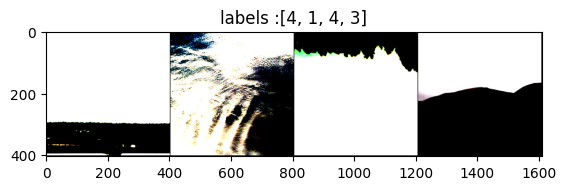

In [ ]:
from torchvision import utils
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# display sample images
def show(img, y=None, color=True):
    npimg = img.numpy()
    npimg_tr = np.transpose(npimg, (1,2,0))
    plt.imshow(npimg_tr)

    if y is not None:
        plt.title('labels :' + str(y))

np.random.seed(1)
torch.manual_seed(1)

grid_size = 4
rnd_inds = np.random.randint(0, len(train_image_datasets), grid_size)
print('image indices:',rnd_inds)

x_grid = [train_image_datasets[i][0] for i in rnd_inds]
y_grid = [train_image_datasets[i][1] for i in rnd_inds]

x_grid = utils.make_grid(x_grid, nrow=grid_size, padding=2)

show(x_grid, y_grid)

## RGB값으로 정규화 진행

In [ ]:
train_transform_dts = train_image_datasets.transform
train_transform_dts

Compose(
    RandomVerticalFlip(p=0.5)
    ToTensor()
    Normalize(mean=[0.52900445, 0.5637425, 0.5797597], std=[0.1748042, 0.15429255, 0.14024465])
)

## 데이터 로드 후 전처리하는 create_datasets함수 생성

In [ ]:
# 1024x1024 resize train / meanR=0.43303847, meanG=0.4034577, meanB=0.39415097  / stdR=0.18344551, stdG=0.17549995, stdB=0.1647388
# 128x128 resize train / meanR=0.43305725, meanG=0.40347522, meanB=0.3941705  / stdR=0.17281055, stdG=0.16584247, stdB=0.15571058


from torch.utils.data.sampler import SubsetRandomSampler
import torch

data_dir = "./data"

def create_datasets(batch_size):

    train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # 좌우반전
    transforms.RandomVerticalFlip(),  # 상하반전
    transforms.Resize((256, 256)),  # 알맞게 변경하세요
    transforms.ToTensor(),  # 이 과정에서 [0, 255]의 범위를 갖는 값들을 [0.0, 1.0]으로 정규화, torch.FloatTensor로 변환
    # transforms.Normalize([meanR, meanG, meanB], [stdR, stdG, stdB])
])
    test_transform = transforms.Compose([   # 나중에 test 데이터 불러올 때 참고하세요.
    transforms.Resize((256, 256)),
    transforms.ToTensor(), # 이 과정에서 [0, 255]의 범위를 갖는 값들을 [0.0, 1.0]으로 정규화
    # transforms.Normalize([meanR, meanG, meanB], [stdR, stdG, stdB])
])

    # choose the training and test datasets
    train_data = datasets.ImageFolder(os.path.join(data_dir, 'train'), train_transform)


    # trainning set 중 validation 데이터로 사용할 비율
    valid_size = 0.1

    # validation으로 사용할 trainning indices를 얻는다.
    num_train = len(train_data)
    indices = list(range(num_train))
    np.random.shuffle(indices)
    split = int(np.floor(valid_size * num_train))
    train_idx, valid_idx = indices[split:], indices[:split]

    # trainning, validation batch를 얻기 위한 sampler정의
    train_sampler = SubsetRandomSampler(train_idx)
    valid_sampler = SubsetRandomSampler(valid_idx)

    # load training data in batches
    train_loader = torch.utils.data.DataLoader(train_data,
                                               batch_size=batch_size,
                                               sampler=train_sampler,
                                               num_workers=4)

    # load validation data in batches
    valid_loader = torch.utils.data.DataLoader(train_data,
                                               batch_size=batch_size,
                                               sampler=valid_sampler,
                                               num_workers=4)

    return train_data, train_loader, valid_loader


# 데이터 시각화

train 데이터셋 크기: 1226
클래스: ['Cb', 'Cc', 'Ns', 'Sc', 'St']


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


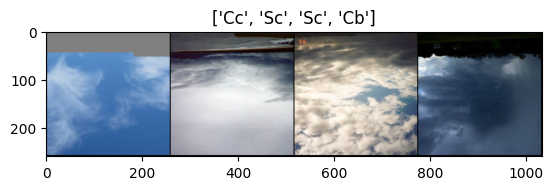

torch.Size([4, 3, 256, 256])


In [ ]:
import torchvision
import matplotlib.pyplot as plt
%matplotlib inline

train_data, train_loader, valid_loader = create_datasets(batch_size=4)


print('train 데이터셋 크기:', len(train_data))

class_names = train_data.classes
print('클래스:', class_names)

def imshow(input, title):
    # torch.Tensor를 numpy 객체로 변환
    input = input.numpy().transpose((1, 2, 0))
    # 이미지 정규화 해제하기
    # mean = np.array([0.43303847, 0.4034577, 0.39415097])
    # std = np.array([0.18344551, 0.17549995, 0.1647388])
    # input = std * input + mean
    # input = np.clip(input, 0, 1)

    # 이미지 출력
    plt.imshow(input)
    plt.title(title)
    plt.show()


# 학습 데이터를 배치 단위로 불러오기
iterator = iter(train_loader)

# 현재 배치를 이용해 격자 형태의 이미지를 만들어 시각화
inputs, classes = next(iterator)
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])
print(inputs.shape)

# cutout_and_rotate

In [ ]:
def cutout_and_rotate(image):
    image = image.clone().detach() # 얕은 복사 문제 주의(원본 유지)
    x_start = np.random.randint(200) # cut out 시작할 x축 위치
    y_start = np.random.randint(200) # cut out 시작할 y축 위치

    image[..., x_start:x_start+50, y_start:y_start+50] = 255 / 100 # 해당 부분 회색 마킹
    return torch.rot90(image, 1, [-2, -1])

<Figure size 1000x1000 with 0 Axes>

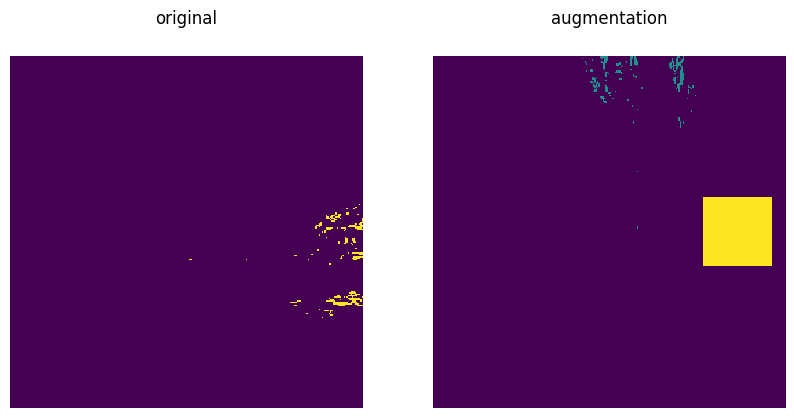

In [ ]:

import matplotlib.pyplot as plt
from matplotlib.pyplot import style

# 흰색 배경 및 크기 지정
style.use('default')
figure = plt.figure()
figure.set_size_inches(10, 10)

# # 흑백으로 출력하기 위한 스타일 설정
# style.use('grayscale')


figure = plt.figure()
figure.set_size_inches(10, 10)


axes = []
for i in range(1, 3):
    axes.append(figure.add_subplot(1, 2, i))


img_example = inputs[1][1].clone().detach().cpu()
original = np.array(img_example).reshape(-1, 256).astype(int)
aug_img = np.array(cutout_and_rotate(img_example)).reshape(-1, 256).astype(int)

axes[0].matshow(original)
axes[1].matshow(aug_img)

# 제목 설정 및 눈금 제거
axes[0].set_axis_off()
axes[0].set_title('original')
axes[1].set_axis_off()
axes[1].set_title('augmentation')

plt.show()

# **⚙️** Alexnet 모델 model_alexnet

In [3]:
import torch
import torch.nn as nn

class AlexNet(nn.Module):
    def __init__(self, num_classes=5):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

# 모델 인스턴스 생성
model_alexnet = AlexNet()

# 임의의 입력 이미지 생성 (예: 256x256 크기의 RGB 이미지)
input_image = torch.randn(1, 3, 256, 256)

# # 모델에 이미지 전달하여 예측 얻기
output = model_alexnet(input_image)


In [5]:
from torchsummary import summary
summary(model_alexnet, (3, 256, 256))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 63, 63]          23,296
              ReLU-2           [-1, 64, 63, 63]               0
         MaxPool2d-3           [-1, 64, 31, 31]               0
            Conv2d-4          [-1, 192, 31, 31]         307,392
              ReLU-5          [-1, 192, 31, 31]               0
         MaxPool2d-6          [-1, 192, 15, 15]               0
            Conv2d-7          [-1, 384, 15, 15]         663,936
              ReLU-8          [-1, 384, 15, 15]               0
            Conv2d-9          [-1, 256, 15, 15]         884,992
             ReLU-10          [-1, 256, 15, 15]               0
           Conv2d-11          [-1, 256, 15, 15]         590,080
             ReLU-12          [-1, 256, 15, 15]               0
        MaxPool2d-13            [-1, 256, 7, 7]               0
AdaptiveAvgPool2d-14            [-1, 25

# ⚙️ 사전 훈련 Resnet18 모델 model_resnet

In [ ]:
# 사전 훈련 된 resnet18 사용
import torch
import torch.nn as nn
import torchvision.models as models

class ResNet(nn.Module):
    def __init__(self, num_classes=5):
        super(ResNet, self).__init__()
        self.model = models.resnet18(pretrained=True)
        num_features = self.model.fc.in_features
        self.model.fc = nn.Linear(num_features, num_classes)

    def forward(self, x):
        return self.model(x)

# 모델 인스턴스 생성
model_resnet = ResNet()

# 임의의 입력 이미지 생성 (예: 256x256 크기의 RGB 이미지)
input_image = torch.randn(1, 3, 256, 256)

# 모델에 이미지 전달하여 예측 얻기
output = model_resnet(input_image)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 109MB/s]


In [ ]:
from torchsummary import summary
summary(model_resnet, (3, 256, 256))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 128, 128]           9,408
       BatchNorm2d-2         [-1, 64, 128, 128]             128
              ReLU-3         [-1, 64, 128, 128]               0
         MaxPool2d-4           [-1, 64, 64, 64]               0
            Conv2d-5           [-1, 64, 64, 64]          36,864
       BatchNorm2d-6           [-1, 64, 64, 64]             128
              ReLU-7           [-1, 64, 64, 64]               0
            Conv2d-8           [-1, 64, 64, 64]          36,864
       BatchNorm2d-9           [-1, 64, 64, 64]             128
             ReLU-10           [-1, 64, 64, 64]               0
       BasicBlock-11           [-1, 64, 64, 64]               0
           Conv2d-12           [-1, 64, 64, 64]          36,864
      BatchNorm2d-13           [-1, 64, 64, 64]             128
             ReLU-14           [-1, 64,

# 📝 alexnet 모델 평가

In [ ]:
learning_rate = 0.0001
loss_fn = nn.CrossEntropyLoss()
num_epochs=20
optimizer = torch.optim.Adam(model_alexnet.parameters(), lr=learning_rate)

total=0

In [ ]:
# 손실 함수와 최적화 알고리즘 정의
learning_rate = 0.0001
loss_fn = nn.CrossEntropyLoss()
num_epochs=20
optimizer = torch.optim.Adam(model_alexnet.parameters(), lr=learning_rate)

total=0

# 학습 함수 정의
def train(model, dataloader, criterion, optimizer, num_epochs):
    model.train()
    total_step = len(dataloader)
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(dataloader):
            images = images.to(device)
            labels = labels.to(device)


            # 순전파
            outputs = model(images)
            loss = criterion(outputs, labels)

            # 역전파 및 최적화
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # 정확도 계산
            correct = 0
            total = 0
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            # 로그 출력
            if (i+1) % 100 == 0:
                acc = 100 * correct / total
                print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Loss: {loss.item():.4f}, Accuracy: {acc:.2f}%")

# 학습 실행
train(model_alexnet, train_loader, loss_fn, optimizer, num_epochs)

Epoch [1/10], Step [100/215], Loss: 1.5335, Accuracy: 50.00%
Epoch [1/10], Step [200/215], Loss: 1.6180, Accuracy: 25.00%
Epoch [2/10], Step [100/215], Loss: 1.5323, Accuracy: 75.00%
Epoch [2/10], Step [200/215], Loss: 1.6223, Accuracy: 0.00%
Epoch [3/10], Step [100/215], Loss: 1.4922, Accuracy: 75.00%
Epoch [3/10], Step [200/215], Loss: 1.5379, Accuracy: 25.00%
Epoch [4/10], Step [100/215], Loss: 1.4833, Accuracy: 25.00%
Epoch [4/10], Step [200/215], Loss: 1.6156, Accuracy: 25.00%
Epoch [5/10], Step [100/215], Loss: 1.5893, Accuracy: 25.00%
Epoch [5/10], Step [200/215], Loss: 1.5768, Accuracy: 25.00%
Epoch [6/10], Step [100/215], Loss: 1.4268, Accuracy: 50.00%
Epoch [6/10], Step [200/215], Loss: 1.6498, Accuracy: 25.00%
Epoch [7/10], Step [100/215], Loss: 1.8580, Accuracy: 0.00%
Epoch [7/10], Step [200/215], Loss: 1.5836, Accuracy: 25.00%
Epoch [8/10], Step [100/215], Loss: 1.7178, Accuracy: 0.00%
Epoch [8/10], Step [200/215], Loss: 1.6472, Accuracy: 25.00%
Epoch [9/10], Step [100/215

# 📝 resnet 모델 평가

In [ ]:
# 손실 함수와 최적화 알고리즘 정의- resnet
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_alexnet.parameters(), lr=learning_rate)

total=0

# 학습 함수 정의
def train(model, dataloader, criterion, optimizer, num_epochs):
    model.train()
    total_step = len(dataloader)
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(dataloader):
            images = images.to(device)
            labels = labels.to(device)


            # 순전파
            outputs = model(images)
            loss = criterion(outputs, labels)

            # 역전파 및 최적화
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # 정확도 계산
            correct = 0
            total = 0
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            # 로그 출력
            if (i+1) % 100 == 0:
                acc = 100 * correct / total
                print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Loss: {loss.item():.4f}, Accuracy: {acc:.2f}%")

# 학습 실행
train(model_resnet, train_loader, loss_fn, optimizer, num_epochs)

Epoch [1/20], Step [100/276], Loss: 1.6481, Accuracy: 25.00%
Epoch [1/20], Step [200/276], Loss: 1.2060, Accuracy: 25.00%
Epoch [2/20], Step [100/276], Loss: 1.4368, Accuracy: 25.00%
Epoch [2/20], Step [200/276], Loss: 1.4598, Accuracy: 25.00%
Epoch [3/20], Step [100/276], Loss: 1.5756, Accuracy: 25.00%
Epoch [3/20], Step [200/276], Loss: 1.3655, Accuracy: 50.00%
Epoch [4/20], Step [100/276], Loss: 1.6735, Accuracy: 25.00%
Epoch [4/20], Step [200/276], Loss: 1.1443, Accuracy: 25.00%
Epoch [5/20], Step [100/276], Loss: 1.4091, Accuracy: 50.00%
Epoch [5/20], Step [200/276], Loss: 1.2097, Accuracy: 75.00%
Epoch [6/20], Step [100/276], Loss: 0.9321, Accuracy: 50.00%
Epoch [6/20], Step [200/276], Loss: 1.6347, Accuracy: 0.00%
Epoch [7/20], Step [100/276], Loss: 1.7062, Accuracy: 25.00%
Epoch [7/20], Step [200/276], Loss: 1.4401, Accuracy: 25.00%
Epoch [8/20], Step [100/276], Loss: 0.7833, Accuracy: 75.00%
Epoch [8/20], Step [200/276], Loss: 0.7058, Accuracy: 75.00%
Epoch [9/20], Step [100/2

In [ ]:
num_epoch = 10
for i in range(num_epoch):
  for j,[image,label] in enumerate(train_loader):
    x = image.to(device)
    y_ = label.to(device)

    optimizer.zero_grad()
    output = model_resnet.forward(x)
    loss = loss_fn(output, y_)
    loss.backward()
    optimizer.step()

    if i % 10 == 0:
        print(f"Epoch: {i}/{num_epoch}, Loss: {loss.item()}")

In [ ]:
correct = 0
total = 0
with torch.no_grad():
  model_alexnet.eval()
  for data in train_loader:
    images, labels = data[0].to(device), data[1].to(device)
    outputs = model_resnet(images)
    _, predicted = torch.max(outputs, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print('Test accuracy: %.2f %%'%(100*correct/total))

# **⚙️** CNN 모델 model_cnn

In [ ]:
import torch
import torch.nn as nn

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()

        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)

        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)

        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.maxpool3 = nn.MaxPool2d(kernel_size=2)

        self.flatten = nn.Flatten()

        self.fc1 = nn.Linear(256 * 32 * 32, 128)
        self.relu4 = nn.ReLU()
        self.fc2 = nn.Linear(128, 5)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)

        x = self.conv2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)

        x = self.conv3(x)
        x = self.relu3(x)
        x = self.maxpool3(x)

        x = self.flatten(x)

        x = self.fc1(x)
        x = self.relu4(x)
        x = self.fc2(x)

        return x

# 모델 인스턴스 생성
model_cnn = CNNModel()

# 임의의 입력 이미지 생성 (예: 3x256x256 크기의 RGB 이미지)
input_image = torch.randn(1, 3, 256, 256)

# 모델에 이미지 전달하여 예측 얻기
output = model_cnn(input_image)

from torchsummary import summary
summary(model_cnn, (3, 256, 256))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 256, 256]           1,792
              ReLU-2         [-1, 64, 256, 256]               0
         MaxPool2d-3         [-1, 64, 128, 128]               0
            Conv2d-4        [-1, 128, 128, 128]          73,856
              ReLU-5        [-1, 128, 128, 128]               0
         MaxPool2d-6          [-1, 128, 64, 64]               0
            Conv2d-7          [-1, 256, 64, 64]         295,168
              ReLU-8          [-1, 256, 64, 64]               0
         MaxPool2d-9          [-1, 256, 32, 32]               0
          Flatten-10               [-1, 262144]               0
           Linear-11                  [-1, 128]      33,554,560
             ReLU-12                  [-1, 128]               0
           Linear-13                    [-1, 5]             645
Total params: 33,926,021
Trainable para

In [ ]:
from torchsummary import summary
summary(model_cnn, (3, 256, 256))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 256, 256]           1,792
              ReLU-2         [-1, 64, 256, 256]               0
         MaxPool2d-3         [-1, 64, 128, 128]               0
            Conv2d-4        [-1, 128, 128, 128]          73,856
              ReLU-5        [-1, 128, 128, 128]               0
         MaxPool2d-6          [-1, 128, 64, 64]               0
            Conv2d-7          [-1, 256, 64, 64]         295,168
              ReLU-8          [-1, 256, 64, 64]               0
         MaxPool2d-9          [-1, 256, 32, 32]               0
          Flatten-10               [-1, 262144]               0
           Linear-11                  [-1, 128]      33,554,560
             ReLU-12                  [-1, 128]               0
           Linear-13                    [-1, 5]             645
Total params: 33,926,021
Trainable para

# 📝 CNN 모델 평가

In [ ]:
# 손실 함수와 최적화 알고리즘 정의
learning_rate = 0.0001
loss_fn = nn.CrossEntropyLoss()
num_epochs=20
optimizer = torch.optim.Adam(model_cnn.parameters(), lr=learning_rate)

total=0

# 학습 함수 정의
def train(model, dataloader, criterion, optimizer, num_epochs):
    model.train()
    total_step = len(dataloader)
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(dataloader):
            images = images.to(device)
            labels = labels.to(device)


            # 순전파
            outputs = model(images)
            loss = criterion(outputs, labels)

            # 역전파 및 최적화
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # 정확도 계산
            correct = 0
            total = 0
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            # 로그 출력
            if (i+1) % 100 == 0:
                acc = 100 * correct / total
                print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Loss: {loss.item():.4f}, Accuracy: {acc:.2f}%")

# 학습 실행
train(model_cnn, train_loader, loss_fn, optimizer, num_epochs)

Epoch [1/20], Step [100/276], Loss: 1.2994, Accuracy: 25.00%
Epoch [1/20], Step [200/276], Loss: 1.3044, Accuracy: 50.00%
Epoch [2/20], Step [100/276], Loss: 1.5316, Accuracy: 25.00%
Epoch [2/20], Step [200/276], Loss: 0.8534, Accuracy: 75.00%
Epoch [3/20], Step [100/276], Loss: 1.2332, Accuracy: 25.00%
Epoch [3/20], Step [200/276], Loss: 1.3811, Accuracy: 25.00%
Epoch [4/20], Step [100/276], Loss: 0.9286, Accuracy: 75.00%
Epoch [4/20], Step [200/276], Loss: 0.7596, Accuracy: 75.00%
Epoch [5/20], Step [100/276], Loss: 0.4877, Accuracy: 100.00%
Epoch [5/20], Step [200/276], Loss: 0.3945, Accuracy: 100.00%
Epoch [6/20], Step [100/276], Loss: 0.9791, Accuracy: 50.00%
Epoch [6/20], Step [200/276], Loss: 1.0752, Accuracy: 50.00%
Epoch [7/20], Step [100/276], Loss: 0.6874, Accuracy: 75.00%
Epoch [7/20], Step [200/276], Loss: 1.0955, Accuracy: 50.00%
Epoch [8/20], Step [100/276], Loss: 1.0170, Accuracy: 50.00%
Epoch [8/20], Step [200/276], Loss: 0.4898, Accuracy: 75.00%
Epoch [9/20], Step [10

# 💭 Self-supervised Learning 'SIMCLR'

In [ ]:
# simclr loss

class SimCLR_Loss(nn.Module):
    def __init__(self, batch_size, temperature):
        super().__init__()
        self.batch_size = batch_size
        self.temperature = temperature

        self.mask = self.mask_correlated_samples(batch_size)
        self.criterion = nn.CrossEntropyLoss(reduction="sum")
        self.similarity_f = nn.CosineSimilarity(dim=2)
        print(self.mask)

    # loss 분모 부분의 negative sample 간의 내적 합만을 가져오기 위한 마스킹 행렬
    def mask_correlated_samples(self, batch_size):
        N = 2 * batch_size
        mask = torch.ones((N, N), dtype=bool)
        mask = mask.fill_diagonal_(0)

        for i in range(batch_size):
            mask[i, batch_size + i] = 0
            mask[batch_size + i, i] = 0
        return mask

    def forward(self, z_i, z_j):

        N = 2 * self.batch_size

        z = torch.cat((z_i, z_j), dim=0)

        sim = self.similarity_f(z.unsqueeze(1), z.unsqueeze(0)) / self.temperature
        # print(sim) # 여기까진 실행 됨.
        reshaped_sim = sim.view(1, 64)
        print(reshaped_sim)
        print(torch.diag(reshaped_sim, 64))


        # loss 분자 부분의 원본 - augmentation 이미지 간의 내적 합을 가져오기 위한 부분
        sim_i_j = torch.diag(reshaped_sim, self.batch_size)
        sim_j_i = torch.diag(reshaped_sim, -self.batch_size)

        print(sim_i_j)

        positive_samples = torch.cat((sim_i_j, sim_j_i), dim=0).reshape(N, 1)
        negative_samples = reshaped_sim[self.mask].reshape(N, -1)

        labels = torch.from_numpy(np.array([0]*N)).reshape(-1).to(positive_samples.device).long()

        logits = torch.cat((positive_samples, negative_samples), dim=1)
        loss = self.criterion(logits, labels)
        loss /= N

        return loss

In [ ]:
import torchsummary
from torchsummary import summary

In [ ]:
iterator = iter(train_loader)
inputs, classes = next(iterator)

In [ ]:
# training
batch_size = 32
learning_rate = 0.0001
num_epoch= 50

# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

model = AlexNet2().to(device)
loss_func = SimCLR_Loss(batch_size, temperature = 0.5) # loss 함수 선언

optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# inputs, classes = inputs.to(device), labels.to(device)
print(device)

for i in range(1, num_epoch + 1):
    total_loss = 0
    for j,[inputs, classes] in enumerate(train_loader):
        inputs, classes = inputs.to(device), classes.to(device)
        origin_vec = model(inputs)
        aug_vec = model(inputs)


        loss = loss_func(origin_vec, aug_vec)
        total_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print('Epoch : %d, Avg Loss : %.4f'%(i, total_loss / len(train_loader)))

In [ ]:
print(train_data)
print(train_loader)
print(valid_loader)

# test 맞추기

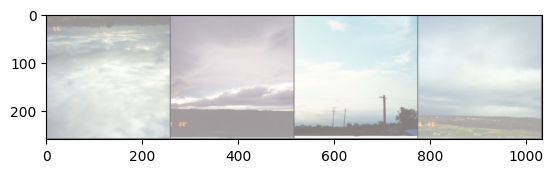

IndexError: ignored

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

batch_size=4
# 이미지를 보여주기 위한 함수

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# 학습용 이미지를 무작위로 가져오기
dataiter = iter(train_loader)
images, labels = next(dataiter)


# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# 정답(label) 출력
print(' '.join(f'{classes[labels[j]]: 3}' for j in range(batch_size)))

# ✅ CNN 모델 정확도 Check

In [ ]:
def check_accuracy(loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()

    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device)
            y = y.to(device=device)

            scores = model(x)
            _, predictions = scores.max(1)
            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)

        print(f'Got {num_correct} / {num_samples} with accuracy {float(num_correct)/float(num_samples)*100:.2f}')

    model.train()

In [ ]:
check_accuracy(train_loader, model)

Got 981 / 1104 with accuracy 88.86


## 📌 88.86 %